In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf

In [18]:
imoveis=pd.read_excel("/Users/chenyenpin/Downloads/3_18/Cópia de imoveis.xlsx")

imoveis.shape

(54, 2)

In [19]:
imoveis.isna().sum()


area     0
preco    0
dtype: int64

In [20]:
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


<AxesSubplot:xlabel='area', ylabel='Count'>

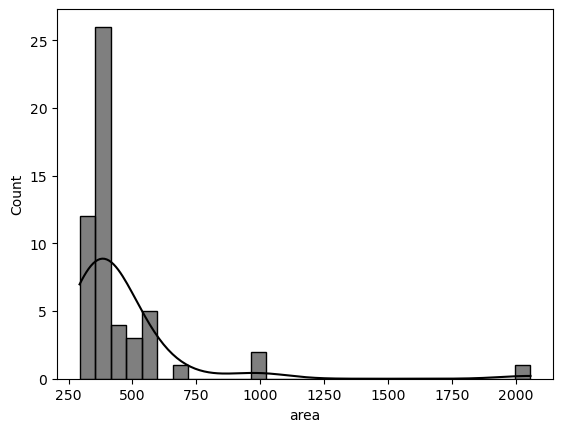

In [21]:
sns.histplot(imoveis,x="area", kde=True, color="black")

<AxesSubplot:xlabel='preco', ylabel='Count'>

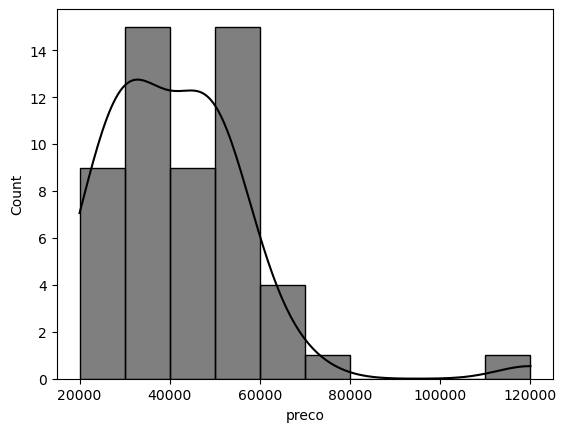

In [22]:
sns.histplot(imoveis, x="preco", kde=True, color="black")

<AxesSubplot:xlabel='area', ylabel='preco'>

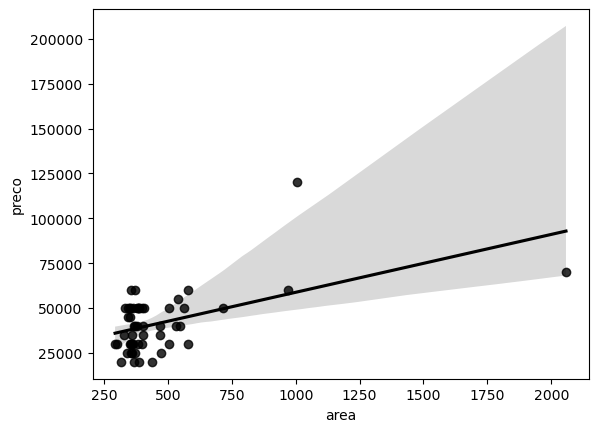

In [23]:
sns.regplot(data=imoveis,x="area", y="preco", fit_reg=True, color="black" )

<AxesSubplot:xlabel='area', ylabel='preco'>

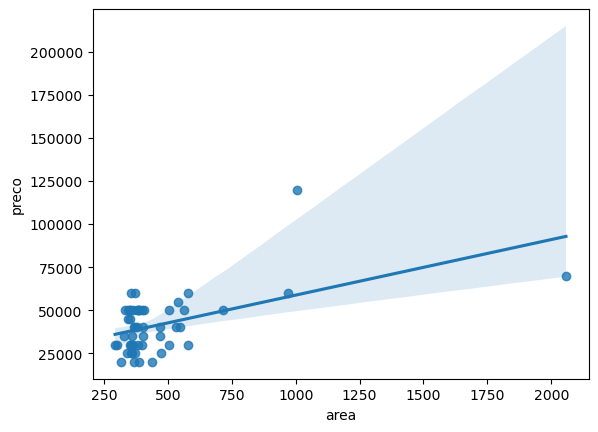

In [24]:
sns.regplot(data=imoveis, x="area", y="preco", fit_reg=True)

In [25]:
alunos=pd.read_excel(r"/Users/chenyenpin/Downloads/aprovacao_alunos.xlsx")

In [26]:
alunos.columns=["2015", "2016"]
alunos

,2015,2016
0,77,85
1,79,81
2,83,85
3,81,82
4,73,76
5,76,75
6,81,82
7,81,81
8,80,81
9,86,85


<AxesSubplot:xlabel='2016', ylabel='2015'>

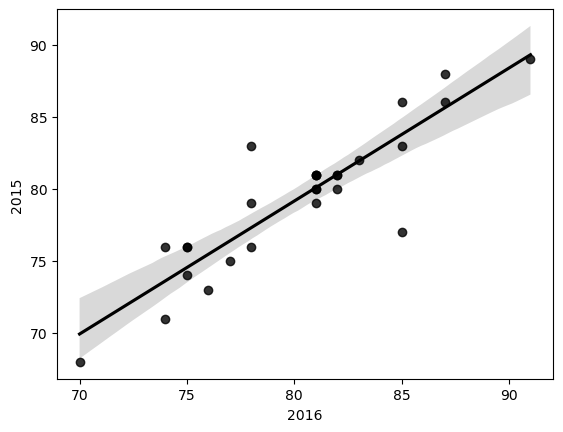

In [27]:
sns.regplot(data=alunos, x="2016", y="2015" ,fit_reg=True, color="black")

<AxesSubplot:xlabel='2015', ylabel='Count'>

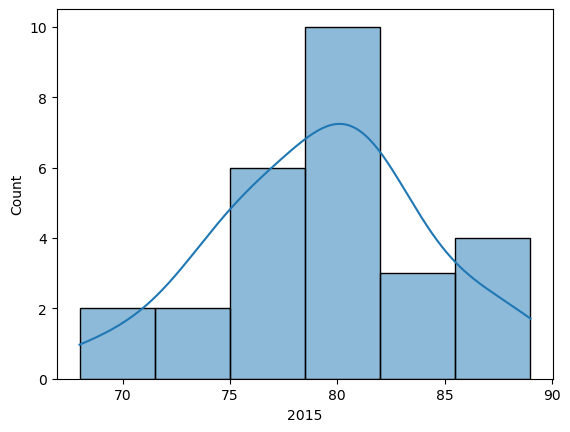

In [28]:
sns.histplot(data=alunos["2015"], kde=True,)

In [29]:
imoveis.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


In [30]:
imoveis.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [31]:
#uso de medida de  normalizacao para 0 a 1 escala logaritimica

scaler=MinMaxScaler()

In [44]:
#normaizando meu data frame
#"renomear a minha tabela nova normaliazdo, passando o paramentro scaler.fit_transform(minha tabela)
#index= index da minha tabela.index, coluna=minha tabela.coluna"
imovel_norm=pd.DataFrame(scaler.fit_transform(imoveis), index=imoveis.index, columns=imoveis.columns)

In [33]:
imovel_norm

,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05
5,0.041375,0.00
6,0.004234,0.10
7,0.100751,0.05
8,0.045291,0.20
9,0.028282,0.30


In [34]:
imovel_norm.describe()

,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


<AxesSubplot:xlabel='area', ylabel='preco'>

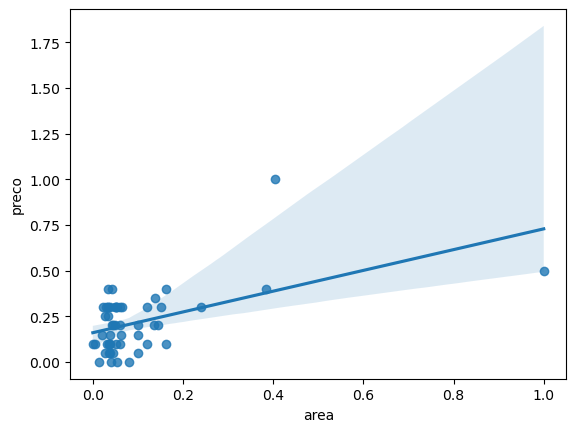

In [35]:
sns.regplot(data=imovel_norm, x="area", y="preco")

In [36]:
function="preco~area"
model=smf.ols(formula=function,data=imovel_norm ).fit()

In [37]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Thu, 01 Jun 2023   Prob (F-statistic):           7.76e-05
Time:                        15:39:39   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

In [38]:
x= imovel_norm[["area"]]
y= imovel_norm[["preco"]]

In [39]:
x_train,x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=50)

lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [40]:
r_sq=lr.score(x_train, y_train)
print(r_sq)

0.2558289380596015


In [41]:
#prevendo quando o modelo esta predizendo errado
y_pred=lr.predict(x_train)
print("MAE:" ,metrics.mean_absolute_error(y_train, y_pred))
print("MSE:" ,metrics.mean_squared_error(y_train, y_pred))
print("RMSE:" ,np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 0.10997360485941048
MSE: 0.02127266710592741
RMSE: 0.14585152418102257


In [42]:
lr.fit(x_test, y_test)


LinearRegression()

In [43]:
y_pred_test=lr.predict(x_test)
print("MAE:" ,metrics.mean_absolute_error(y_test, y_pred_test))
print("MSE:" ,metrics.mean_squared_error(y_test, y_pred_test))
print("RMSE:" ,np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

MAE: 0.09940543341898826
MSE: 0.013081042604516462
RMSE: 0.11437238567292571
